In [1]:
# standard packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Physics 381:   Fractals and the Mandlebrot set

Starting with some initial configuration (state) of a physical system or model we may want to determine the phase space trajectory corresponding to some set of governing equations.  This can often be represented as a set of coupled first order differential equations

  $$ \dot y(t) = f(y, t)  $$
  
Although there are closed form solutions for many interesting problems, there are infinitely more problems that can only be solved numerically.  For those cases we end up solving a *difference* equation

  $$ y(t_{i+1}) = f\left [ y(t_i), \,  y(t_{i-1}), \ldots \right ] $$

with solutions that (hopefully) are (nearly) the same as the differential equations.

## Iterated functions

A related process starts with some intial state vector $x_0$ and applies some function $f(x)$ to it

  $$ x_1 = f(x_0) $$

then applies the same function to the new value $x_1$ 

  $$ x_2 = f(x_1) = f(\, f(x_0) \,) $$
  
so that after $N$ iterations we have 

  $$ x_N = f(x_{N-1}) = f( f( \ldots f(x_0) \ldots) ) $$

Although it may be tempting to code this up using recursion, this is almost always a bad idea.

The simplest non-trivial state vector is a single real ($x$) or complex ($z$) number.  One interesting class of functions can be written in the form

  $$ z_{i+1} = a \, z^b + c $$

In [2]:
def plot_complex_trajectory(z, c, nsteps=49, text=False, arrow=False):

    """
    This is an example of Google style docstrings
    
    Calculate iterated function 
    
            $ z_{i+1} = z_i^2 + c $
            
    and plot in complex plane
    
    Args: 
        z: real or complex starting point
        c: real or complex offset
        nsteps: number of iterations
        text: plot text (default False)
        arrow: plot arrow (default False)
    
    Returns:
        None
    """
    
    result = []
    for n in range(nsteps):
        
        z, z0 = z**2 + c, z
        if not np.isfinite(z): break    # quit if diverged to infinity
        if np.abs(z) > 1e3: break       # quit if becoming very large
        result.append(z)
    
        dz = z - z0
        if np.abs(dz) > 99: continue     # don't plot large steps

        plt.plot( [z0.real, z.real], [z0.imag,z.imag] )
               
        s = str(n) if text else ""  # labels
        if (n<5) and arrow:
#            plt.arrow(z0.real, z0.imag, dz.real, dz.imag, length_includes_head=True, head_width=0.03)
            plt.annotate(s, xy=(z.real,z.imag), xytext=(z0.real,z0.imag), 
                         bbox=dict(facecolor='wheat', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.5),
                         arrowprops=dict(connectionstyle="arc3,rad="+str((-1.0)**n) ))
    
    return result

In [3]:
help(plot_complex_trajectory)

Help on function plot_complex_trajectory in module __main__:

plot_complex_trajectory(z, c, nsteps=49, text=False, arrow=False)
    This is an example of Google style docstrings
    
    Calculate iterated function 
    
            $ z_{i+1} = z_i^2 + c $
            
    and plot in complex plane
    
    Args: 
        z: real or complex starting point
        c: real or complex offset
        nsteps: number of iterations
        text: plot text (default False)
        arrow: plot arrow (default False)
    
    Returns:
        None



##  b=1, c=0

A very simple recurrence relation

  $$ x_{i+1} = a \times x_{i} $$
  
contains both radioactive decay and compound interest.  

## a=1, b=2, c=0

Start with a real number and square it repeatedly

  $$  x_1 = x_0^2 $$
  $$  x_2 = x_1^2 = x_0^4 $$
  $$  x_3 = x_2^2 = x_1^4 = x_0^6 $$  
  
There are three possible outcomes:  
  
 \#1) The result for $x_0=1$ after $n$ iterations is $x_n=1.0$.  This is known as a "fixed point".

 \#2) If $|x_0|<1$ then $x_n \rightarrrow 0$

 \#3) If $|x_0|>1$ then $x_n \rightarrrow \infty$
  

(0.81+0j)
(0.6561000000000001+0j)
(0.43046721000000016+0j)
(0.18530201888518424+0j)
(0.03433683820292518+0j)


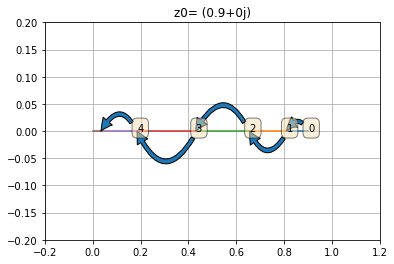

In [4]:
z0 = 0.90 + 0j
zvalues =  plot_complex_trajectory( z0, 0, arrow=True, text=True)
plt.xlim(-0.2, 1.2) ; plt.ylim(-0.2, 0.2)
plt.title( 'z0= '+ str(z0) )
plt.grid('on')
for z in zvalues[0:5]: print(z)

(1.1449+0j)
(1.31079601+0j)
(1.7181861798319202+0j)
(2.9521637485654075+0j)
(8.71527079834376+0j)


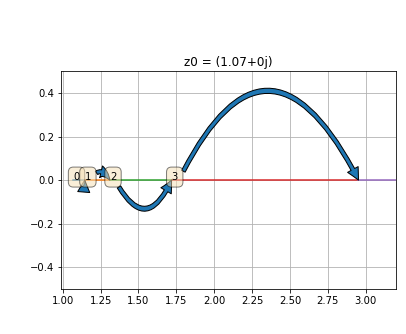

In [5]:
z0 = 1.07 + 0j
zvalues = plot_complex_trajectory( z0, 0, arrow=True, text=True) 
plt.xlim(0.99, 3.2) ; plt.ylim(-0.5, 0.5)
plt.title('z0 = '+str(z0))
plt.grid('on')
#plt.xscale('log')
for z in zvalues[0:5]: print(z)

Note that if $x_0<0$ then the minus sign will be removed after the first iteration.  After that, things will proceed as for the positive values.

(0.81+0j)
(0.6561000000000001+0j)
(0.43046721000000016+0j)
(0.18530201888518424+0j)
(0.03433683820292518+0j)


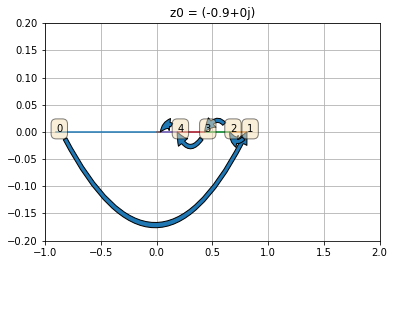

In [6]:
z0 = -0.90 + 0j
zvalues = plot_complex_trajectory( z0, 0, arrow=True, text=True) 
plt.xlim(-1.0, 2.0) ; plt.ylim(-0.2, 0.2)
plt.title('z0 = '+str(z0))
plt.grid('on')
for z in zvalues[0:5]: print(z)

For a complex number $z_0$ then each iteration will square the magnitude and double the phase

  $$ z_0 = x + i y = A e^{i \theta} $$
  
  $$ z_0^{n} = A^{n} e^{i n \theta} $$
  
There are three possible outcomes:

 \#1) If $A=1$ then the sequence will remain on the unit circle while the phase clocks around increasingly quickly $z_n = e^{i 2 n \theta}$.
 
 \#2) If $A<1$ then the sequence will eventually end up at $z_n=0$.
 
 \#3) If $A>1$ then the sequence will eventually end up at $|z_n| =\infty$.
 

0.99996884 (0.80503116+0.5931799999999999j)
0.9999376809709455 (0.29621265617094567+0.9550567669775999j)
0.9998753658255525 (-0.8243914904738587+0.5657998034809415j)
0.9997507471847824 (0.35949191194663827-0.9328810866029394j)
0.9995015564965305 (-0.7410326869864314-0.6707264108834963j)


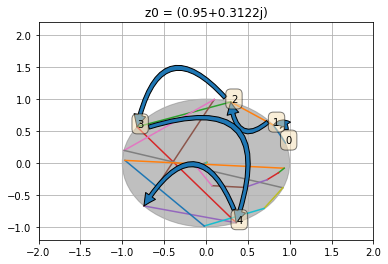

In [7]:
z0 =  0.95 + 0.3122j
zvalues = plot_complex_trajectory( z0, 0, arrow=True, text=True) 
plt.xlim(-2.0, 2.0) ; plt.ylim(-1.2, 2.2)
plt.title('z0 = '+str(z0))
plt.grid('on')
fig = plt.gcf()  ;  ax = fig.gca()
circle1 = plt.Circle((0, 0), 1.0, color='gray', alpha=0.5)
ax.add_artist(circle1)
for z in zvalues[0:5]: print( abs(z), z )

1.00003129 (0.8049687099999999+0.5933700000000001j)
1.000062580979064 (0.29588666717906387+0.9552885669054j)
1.000125165874507 (-0.8250273262458387+0.565314300511806j)
1.0002503474155102 (0.36108983068920514-0.9327994916795838j)
1.0005007575048486 (-0.739729025850531-0.673648821035115j)


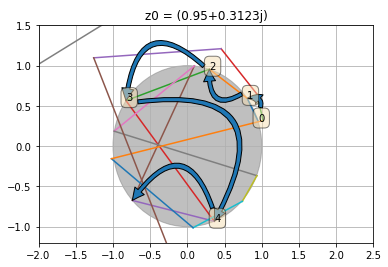

In [8]:
z0 =  0.95 + 0.3123j
zvalues = plot_complex_trajectory( z0, 0, arrow=True, text=True) 
plt.xlim(-2.0, 2.5) ; plt.ylim(-1.2, 1.5)
plt.title('z0 = '+str(z0))
plt.grid('on')
fig = plt.gcf()  ;  ax = fig.gca()
circle1 = plt.Circle((0, 0), 1.0, color='gray', alpha=0.5)
ax.add_artist(circle1)
for z in zvalues[0:5]: print( abs(z), z )

## Phase space diffusion

Consider a set of points spanning a very small amount of arc ($\theta = 0.0^\circ$ to $0.3^\circ$) just inside the unit circle.

After the first iteration they will all be slightly closer to the origin but their angular separation will also be slightly larger.  Each successive iteration will increase the angular separation while decreasing the radius.  For a while, this will increase the distance between neighboring points (diffusion), but eventually they will all end up spiraling into the origin.

A similar set of points just outside the unit circle will exhibit similar increases in angular separation, but will also move further apart as each point goes to infinity.

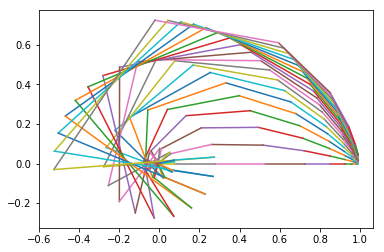

In [9]:
r=0.99
theta=np.linspace(0.0, 0.05, 19) 
z0 = r*np.exp(theta*1j)
for z in z0:
    plot_complex_trajectory( z, 0, nsteps=9)

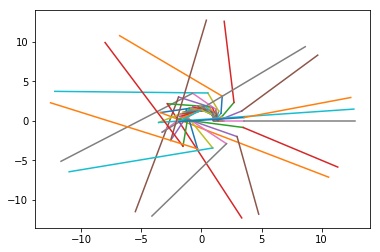

In [10]:
r = 1.01
theta=np.linspace(0.0, 0.05, 19) 
z0 = r*np.exp(theta*1j)
for z in z0:
    plot_complex_trajectory( z, 0, nsteps=9)

## a=1, b=2

Starting with a complex number at the origin $z_0 = 0$, we will iterate by squaring and adding another complex number $c$.

  $$  z_{i+1} = z_i^2 + c $$

The resulting behavior is surprisingly complex.

We might be able to guess the outcome for very small or very large values of $c$.

Simply plotting the results for a range of $c$ values shows a tangle of paths around the origin.

(-1.1+0j) (0.1100000000000001+0j) ... (-1.0916079783099617+0j) (0.0916079783099617+0j) (-1.0916079783099617+0j)
-1.1
0.1100000000000001
-1.0879
0.08352641000000016
-1.093023338832512
0.09470001923257199
-1.0910319063573506
0.0916207904584696
-1.0916056307557653
0.09160285309769223
-1.0916089173043626
0.0916100283384027
-1.0916076027078372
0.09160715828955124


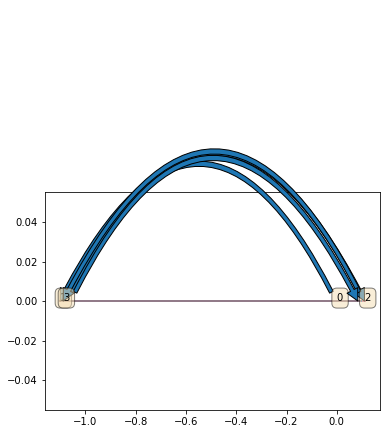

In [11]:
z = 0.0 + 0.0j
c = -1.1
stack = []
for i in range(99):
    z = z*z + c
    stack.append(z)
    
print( stack[0], stack[1], '...', stack[-3], stack[-2], stack[-1])
zvalues = plot_complex_trajectory( 0.0, -1.1, arrow=True, text=True, nsteps=4 )

zvalues = plot_complex_trajectory( 0.0, -1.1, arrow=False, text=False, nsteps=24 )
for z in zvalues[0:7]: print(z)
for z in zvalues[-7:]: print(z)

(-1.148664569111808+0j)
(0.01943029233281557+0j)
(-1.2996224637398615+0j)
(0.38901854825726745+0j)
(-1.148664569111808+0j)


[-1.3, 0.3900000000000001, -1.1479, 0.017674409999999696, -1.299687615231152]

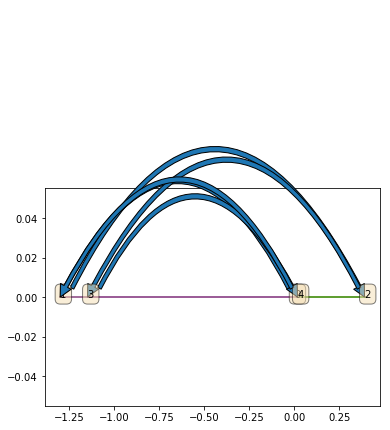

In [12]:
z = 0.0 + 0.0j
c = -1.3
stack = []
for i in range(99):
    z = z*z + c
    stack.append(z)
    
for indx in [-5,-4,-3,-2,-1]: print(stack[indx])
plot_complex_trajectory( 0.0, -1.3, arrow=True, text=True, nsteps=5 )

(-1.1407957571068708-0.01617801306003855j)
(0.0011532313264674965+0.08691161731462305j)
(-1.3075522992817512+0.05020045839944236j)
(0.40717292933348004-0.08127944961037752j)
(-1.1408165545469588-0.016189583184940792j)
(0.0012003085246921064+0.08693868901719107j)
(-1.3075568949074734+0.05020870649910578j)
(0.40718411921176-0.08130148073458286j)
(-1.1408110238313791-0.016209343647045987j)


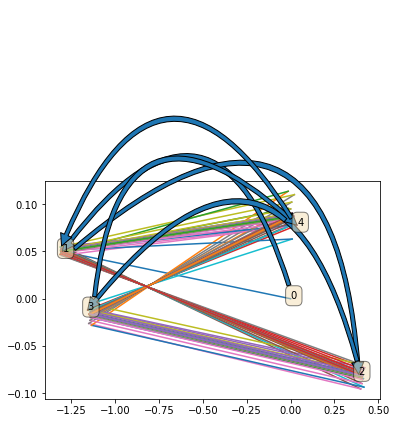

In [13]:
z0 = 0.0 + 0.0j
c0 = -1.3 + 0.05j

zvalues = plot_complex_trajectory( z0, c0, arrow=True, text=True, nsteps=195 )
for z in zvalues[-9:]: print(z)

(-5, 5)

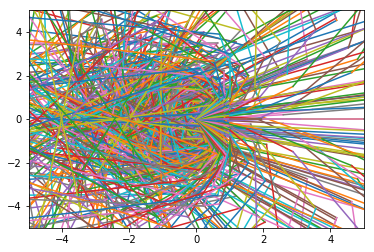

In [14]:
for x in np.linspace(-2.0, 1.0, 19):
    for y in np.linspace(-2.0, 1.0, 19):
        plot_complex_trajectory( 0.0, x+y*1j, nsteps=9)
plt.xlim(-5,5) ; plt.ylim(-5,5)

## numpy Mandlebrot

Tracing out trajectories one at a time is relatively slow.  It is much faster to set up 2D grids of complex numbers and apply computationally efficient vectorized functions.

Running through 99 interations for 40,000 points takes much less time than our previous "loopy" approach.
We can take the resulting grid, identify which points have not yet diverged to infinity, and show them as an image.

The resulting pattern is highly structured.

C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: overflow encountered in multiply
C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in multiply
C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in less


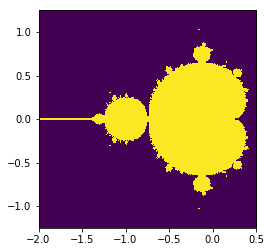

In [35]:
nx, ny = 201, 199
x = np.linspace(-2.0, 0.5, nx)
y = np.linspace(-1.25, 1.25, ny) 
xx,yy = np.meshgrid( x, y )
cgrid = xx + 1j * yy
z = 0.0 + 0.0j
for i in range(99): z = z*z + cgrid
#plt.imshow( np.abs(z), extent=[min(x), max(x), min(y), max(y)] )
plt.imshow( np.abs(z)<2.0, extent=[min(x), max(x), min(y), max(y)] )



In [16]:
def mandlebrot_set_value(cgrid, nloops = 99):
    """ docstring """
    nx, ny = cgrid.shape
    z = np.zeros( [nx,ny], dtype=np.complex )
    
    for i in range(nloops):
        z = z**2 + cgrid
        
    return z


def mandlebrot_count(cgrid, z0=0+0j, maxloops=999):
    """ docstring """
    z = z0*z0 + cgrid
    count = np.zeros(z.shape, dtype=np.int16)
    #count = np.int16(0*z)
    
    for nloops in range(maxloops):

        working = np.abs(z) < 2.0          
        if np.sum(working)==0:
            print('all points have diverged, exiting')
            break
            
        count[working] == nloops
        z[working] = (z**2 + cgrid)[working]
        #z[working] = z[working]**2 + cgrid[working]  # this might be faster (fewer calculations)

    return count

If we zoom into a smaller region then we can see fine details that look a lot like the large scale structure.

And zooming in even more seems to find self-similarity on even smaller scales

/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in square
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in square
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in log


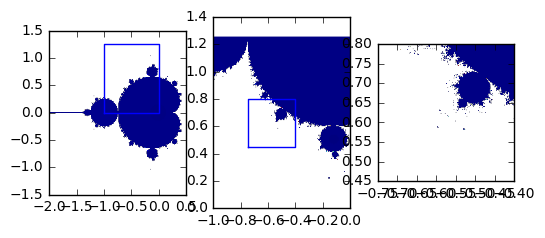

In [17]:
fig, axes = plt.subplots(1,3)


nx, ny = 201, 199
x = np.linspace(-2.0, 0.5, nx)
y = np.linspace(-1.25, 1.25, ny) 
xx,yy = np.meshgrid( x, y )
cgrid = xx + 1j * yy

vgrid = mandlebrot_set_value(cgrid)

corners = ( np.min(xx), np.max(xx), np.min(yy), np.max(yy) )
axes[0].imshow( np.log( np.abs(vgrid) ) , extent=corners)
corners0 = corners


nx, ny = 201, 199
x = np.linspace(-1.0, 0.0, nx)
y = np.linspace(0.0, 1.25, ny) 
xx,yy = np.meshgrid( x, y )
cgrid = xx + 1j * yy

vgrid = mandlebrot_set_value(cgrid)

corners = ( np.min(xx), np.max(xx), np.min(yy), np.max(yy) )
axes[1].imshow( np.log( np.abs(vgrid) ) , extent=corners)
corners1 = corners

nx, ny = 201, 199
x = np.linspace(-0.75, -0.4, nx)
y = np.linspace(0.45, 0.8, ny) 
xx,yy = np.meshgrid( x, y )
cgrid = xx + 1j * yy

vgrid = mandlebrot_set_value(cgrid)

corners = ( np.min(xx), np.max(xx), np.min(yy), np.max(yy) )
axes[2].imshow( np.log( np.abs(vgrid) ) , extent=corners)
corners2 = corners

axes[0].plot( [corners1[0],corners1[1],corners1[1],corners1[0],corners1[0]], [corners1[2],corners1[2],corners1[3],corners1[3],corners1[2]])
axes[1].plot( [corners2[0],corners2[1],corners2[1],corners2[0],corners2[0]], [corners2[2],corners2[2],corners2[3],corners2[3],corners2[2]])

## Pause for thought
and
## Step away from the keyboard

If we find ourselves cutting and pasting the same code more than once or twice, then it is time to think about bundling it up into one or more functions.

Note change from value to count

/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in square
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in square
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in absolute
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in less


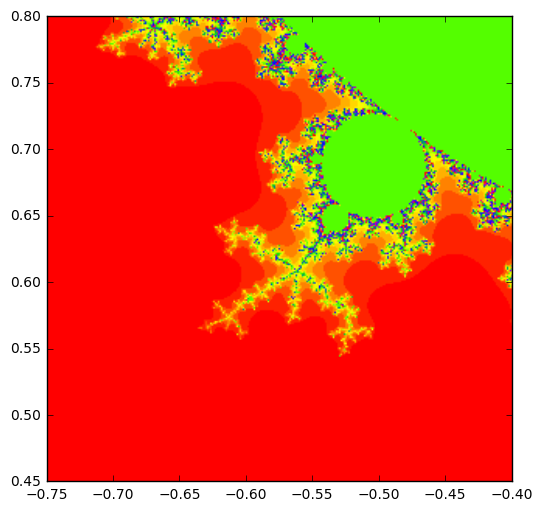

In [18]:
def mandlebrot_set_count(cgrid, maxloops = 999):
    """ docstring goes here """
    nx, ny = cgrid.shape
    z = np.zeros( [nx,ny], dtype=np.complex )
    nloops = np.zeros( [nx,ny], dtype=np.int16 )
    
    for i in range(maxloops):
        z = z**2 + cgrid
        nloops[ np.abs(z) < 2 ] = i
        
    return nloops


def show_mandlebrot_set(nx=300, ny=300, xlim=[-2.0,0.5], ylim=[-1.25,1.25], maxloops=999, plot=False):
    """ docstring goes here """
    x = np.linspace( xlim[0], xlim[1], nx )
    y = np.linspace( ylim[0], ylim[1], ny )
    xx, yy = np.meshgrid( x, y )
    c = xx + yy*1j
    countgrid = mandlebrot_set_count(c, maxloops)

    if plot:
        corners = ( np.min(xx), np.max(xx), np.min(yy), np.max(yy) )
        plt.figure( figsize=(6,6) )
        plt.imshow( countgrid, extent=corners)
        plt.set_cmap('prism')
        
    return countgrid


img = show_mandlebrot_set(300, 300, xlim=[-0.75, -0.4], ylim=[0.45, 0.8], plot=True)

/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in square
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in square
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in less
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in absolute


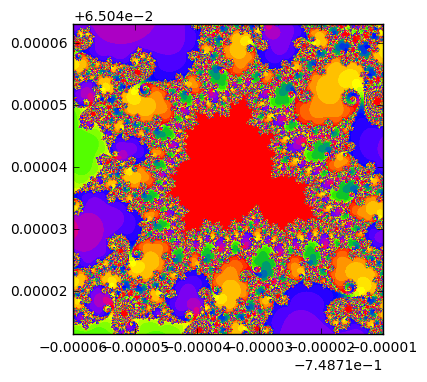

In [19]:
#-0.74877 <= x <= -0.74872
#0.065053 <= y <= 0.065103

nx, ny = 900,900
xx, yy = np.meshgrid( np.linspace(-0.74877, -0.74872, nx), np.linspace(0.065053, 0.065103, ny) )
cgrid = xx + 1j * yy
test = mandlebrot_set_count(cgrid)

corners = ( np.min(xx), np.max(xx), np.min(yy), np.max(yy) )
plt.imshow( -test , extent=corners)

## Julia sets

/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in square
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in add
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: overflow encountered in multiply
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in multiply
/home/bjackel/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in less


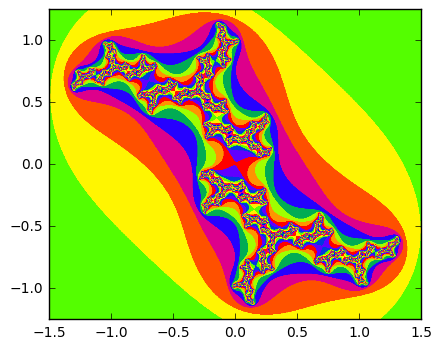

In [20]:
def julia_set_count(zgrid, cvalue, maxloops = 999):
    
    nx, ny = zgrid.shape
    z = zgrid.copy() #cgrid.copy() #np.ones( [nx,ny], dtype=np.complex )
    nloops = np.zeros( [nx,ny], dtype=np.int16 )
    
    for i in range(maxloops):
        nloops[ (z.real**2 + z.imag**2) < 4 ] = i
        #z *= z
        #z += cvalue
        z.__imul__(z).__iadd__(cvalue)
        
    return nloops

nx, ny = 1000, 1000
xx, yy = np.meshgrid( np.linspace(-1.5, 1.5, nx), np.linspace(-1.25, 1.25, ny) )
zgrid = xx + 1j * yy
cvalue = 0.286+0j
cvalue = -0.05 -0.934j
test = julia_set_count(zgrid, cvalue, maxloops=80)
corners = ( np.min(xx), np.max(xx), np.min(yy), np.max(yy) )
plt.imshow( -test , extent=corners)

## Question \#1

After 100 iterations of the Mandlebrot set, search the following region for periodic points and tabulate the results.  Is this a significant fraction of the remaining points?
<pre>
nx, ny = 299,301
xlim=[-0.75, -0.4] ;  ylim=[0.45, 0.8]
x = np.linspace( xlim[0], xlim[1], nx )
y = np.linspace( ylim[0], ylim[1], ny )
xx, yy = np.meshgrid( x, y )
c = xx + yy*1j 
z = 0.0 + 0.0j
</pre>

First I create a function that builds on top of mandlebrot_set_count/show_mandlebrot_set. I examine each list of iterated values of z from a single grid point and look for their periodicity. The identification of periodicity is done by linearly examining the last element in that list with respect to each element to the left using for loop, terminating when the two values are relatively close (up to some tolerance). If no values are found, the loop just passes. More details in the code.

In [2]:
def Periodic_points(nx=299,ny=301,xlim=[-0.75,-0.4],ylim=[0.45,0.8],maxloopsm = 100, Plot_ppoints=True, tol=0.0001, inc_static_point=True,tabulate=False):
    """arguments: (nx,ny,[xmin,xmax],[ymin,ymax],maxloopsm,Plot_ppoints,tol,inc_static_point)
        Plot_ppoints: (boolean) determines whether to generate plot of periodic points on complex plane
        tol: (float) tolerance value used to determine at what difference a cycle is generated.
        inc_static_point: (boolean)determines whether to generate plot including cycle of zero period.
        tabulate: (boolean): decide whether to generate  a table of periodic values with period
        
        This master function generates the plot of collection of initial values that behave periodically upon complex recursion z^2+c.
        also generates a table of periods and their corresponding complex initial values.
        
    """
    #set up grid of complex numbers in a given range specified.
    x = np.linspace( xlim[0], xlim[1], nx )
    y = np.linspace( ylim[0], ylim[1], ny )
    xx,yy = np.meshgrid( x, y )
    c=xx+yy*1j
    #cgrid = xx + 1j * yy
    #z = 0.0 + 0.0j

    def mandlebrot_set_count(cgrid, maxloops=maxloopsm):
        """called by show_mandlebrot_set and return a grid of number containig information on the rate of divergence.
        Also returns a list: zz that contains all the values of z values throughout the recursion and stored it as a list."""
        nx, ny = cgrid.shape
        z = np.zeros( [nx,ny], dtype=np.complex )
        nloops = np.zeros( [nx,ny], dtype=np.int16 )
        zz=[]

        for i in range(maxloops):
            z = z**2 + cgrid
            nloops[ np.abs(z) < 2 ] = i
            zz.append(z)

        return nloops,zz

    def show_mandlebrot_set(nx=299, ny=301, xlim=[-0.75,-0.4], ylim=[0.45,0.8], maxloops=maxloopsm, plot=False):
        """ used to generate the plots of mandlebrot set by calling to mandlebrot_set_count.
        Also return (pass) zz list generated by mandle_brot_set_count. To be used in period function"""
        #x = np.linspace( xlim[0], xlim[1], nx )
        #y = np.linspace( ylim[0], ylim[1], ny )
        #xx, yy = np.meshgrid( x, y )
        c = xx + yy*1j
        Total_points=0

        countgrid,zz= mandlebrot_set_count(c, maxloops)
        if plot:
            corners = ( np.min(xx), np.max(xx), np.min(yy), np.max(yy) )
            plt.figure( figsize=(6,6) )
            plt.imshow( countgrid, extent=corners)
            plt.set_cmap('prism')
            
        for i in range(0,len(countgrid)):
            for j in range(0,len(countgrid[i])):
                if countgrid[i][j]==maxloopsm-1:
                    Total_points=Total_points+1
        
        return countgrid,zz,Total_points

    def period(tol,zz,Plot_ppoints):
        """Used to generate plots and tables of periodic points the periodic plots"""
        Period_ppoint=[]
        
        #For the purpose of plots later, I create 2 more grids. One with zeros and one with initial values of z.
        x2=np.linspace(xlim[0],xlim[1],nx)
        y2=np.linspace(ylim[0],ylim[1],ny)
        xx2,yy2=np.meshgrid(x2,y2)
        c2=xx2+yy2*1j
        TF_Table=np.zeros( [nx,ny], dtype=np.int16 )
        #num_period_set=0
        period_initialvalues=[]
        
        
        for i in range(0,ny):
            for k in range(0,nx):
                
                #to be used in the following codes. see comments below
                TruthTable=[] # used to determine divergence of a list
                list1=[]# used to temporarily store values of z
                targetlist=[] # used to store cycles of a periodic point. Used to determine cardinality of each periodic point.

                for z in range(0,len(zz)):
                    list1.append(zz[z][i][k]) # for convenience, I append the series of z values correspoding to a specific place in the grid as list1
                for y in range(0,len(list1)):
                    TruthTable.append(np.isnan(list1[y])) # to be used to determine divergence in the following code


                for p in range(0,len(list1)-1):
                    if True in TruthTable:   #This if statement triggers is there is a nan (indication of divergence)in the array,
                        break
                    elif abs(list1[-1].real-list1[-2-p].real)<tol and abs(list1[-1].imag-list1[-2-p].imag)<tol:
                        # this elif triggers if it encounetrs a value that is similar to the last element of the list of recursive values z.
                        upper_index=list1.index(list1[-1])
                        low_index=list1.index(list1[-2-p])
                        period_initialvalues.append([(upper_index-low_index),c2[i][k]])

                        for l in range(low_index,upper_index+1): # this target list stores the cycle of a peridic point starting from the end of the list1
                            targetlist.append(list1[l])
                        #if it does encounter a periodic point, it completely skips through that specific list1. So no problem encountered

                        break
                # The decision to include the static points comes down to examining the cardinality of the targetlist.
                # If the cardinality is 1, then its static up to some tolerance. If not, they are periodic
                if inc_static_point==True:
                    if len(targetlist)>0 and len(targetlist)<maxloopsm:
                        TF_Table[i][k]=1
                        Period_ppoint.append([len(targetlist),c2[i][k]])
                elif inc_static_point==False:
                    if len(targetlist)>1 and len(targetlist)<maxloopsm:
                        TF_Table[i][k]=1
                        Period_ppoint.append([len(targetlist),c2[i][k]])
        if tabulate==True:
            countlist=[]
            print('%-40s%-40s' % ('Period','Periodic Point'))
            listofperiods=np.linspace(0,100,num=101)
            for g in listofperiods:
                count=0
                for t in range(0,len(period_initialvalues)):
                    if period_initialvalues[t][0]==g:
                        print('%-40s%-40s' %(str(period_initialvalues[t][0]),str(period_initialvalues[t][1])))
                        count=count+1
                    else:
                        pass
                if count!=0:
                    countlist.append([g,count])
            for f in range(0,len(countlist)):
                print("   Number of periodic points with period ",int(countlist[f][0])," :",countlist[f][1])

        #ppoint counts the number of periodic points countered up to some tolerance
        ppoint_count=0
        for i in range(0,len(TF_Table)):
            for j in range(0,len(TF_Table[i])):
                if TF_Table[i][j]==1:
                    ppoint_count=ppoint_count+1
        print("number of periodic points: ",ppoint_count)
        if Plot_ppoints==True:
            plt.figure( figsize=(8,8) )
            plt.title('Peridic points of Mandlebrot set')
            plt.imshow(TF_Table,extent=[-0.75,-0.4,0.45,0.80])
            plt.set_cmap('prism')
            plt.savefig('figure.jpeg')
    img,zz,tot = show_mandlebrot_set(299, 301, xlim, ylim, plot=False)
    period(tol,zz,Plot_ppoints)
    print("total points that do not strictly diverge: ",tot)


Now let's look at the result for the domain in the question along with the location of periodic points. Plots are only there to show the location of periodic points, but does not provide much insight until we look at the entire region.

C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: overflow encountered in square
C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in square
C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning: overflow encountered in absolute
C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning: invalid value encountered in less


Period                                  Periodic Point                          
0                                       (-0.505704697987+0.556166666667j)       
0                                       (-0.504530201342+0.556166666667j)       
0                                       (-0.503355704698+0.556166666667j)       
0                                       (-0.502181208054+0.556166666667j)       
0                                       (-0.508053691275+0.557333333333j)       
0                                       (-0.506879194631+0.557333333333j)       
0                                       (-0.505704697987+0.557333333333j)       
0                                       (-0.504530201342+0.557333333333j)       
0                                       (-0.503355704698+0.557333333333j)       
0                                       (-0.502181208054+0.557333333333j)       
0                                       (-0.501006711409+0.557333333333j)       
0                           

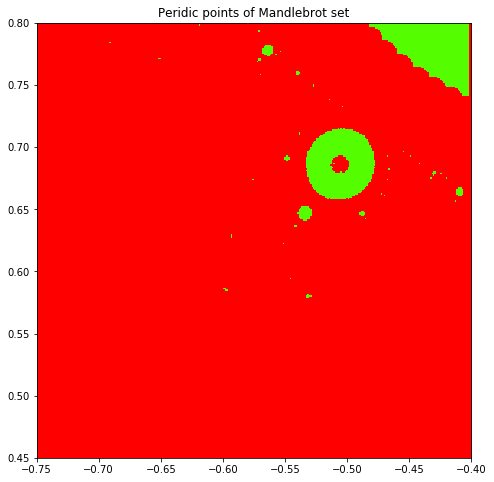

In [3]:
Periodic_points(nx=299, ny=301, xlim=[-0.75,-0.4], ylim=[0.45,0.8], maxloopsm = 100, Plot_ppoints=True, tol=0.0001,inc_static_point=False,tabulate=True)

Most of the periodic poinst found seem to have periods of 5 or 1.

Note that the total points found are the points that do not strictly diverge, meaning the points in the grid with values of 99 (for 100 iterations) in mandlebrot_set_count are only counted. The number of periodic points calculated represent significant portion of the total count, approximately 25%. This percentage however may not be accurate because it is significantly dependent on the tolerance value. Consider reducing the tolerance by a factor of 10 as shown below.

C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: overflow encountered in square
C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in square
C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning: overflow encountered in absolute
C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning: invalid value encountered in less


number of periodic points:  2122
total points that do not strictly diverge:  15682


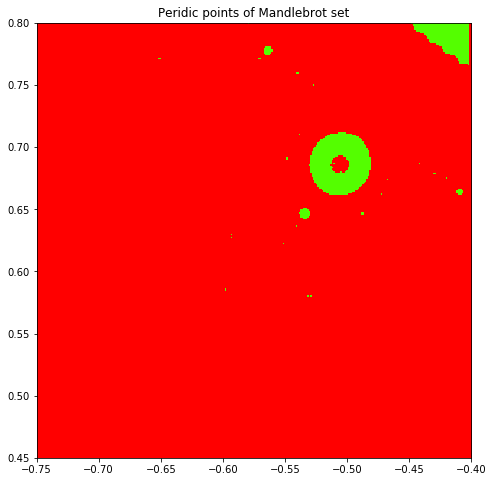

In [4]:
Periodic_points(nx=299, ny=301, xlim=[-0.75,-0.4], ylim=[0.45,0.8], maxloopsm = 100, Plot_ppoints=True, tol=0.00001,inc_static_point=False,tabulate=False)

Reducing the tolerance value by a factor of 10 reduced the number of periodic points from 3944 into 2122, a significant change no doubt. Two sources of error comes to my mind. One is that the maximum iteration is only 100. The periodic points have an attractice property that attracts certain initial z values into the periodic loop. For small iteration, the values may have not reached the 'real' orbits of the cycles of periodic points. Second is that my algorithm for determining the periodicity is limited. My code do not look at the entire set of values and determine the periodicity of that list. I simply look at the very last elements and use for loop to compare values one by one, starting from the last element until I reach a value close to the last element. Perhaps with advanced algorithm, this issue issue can be resolved. But no such algorithm comes to my mind immediately.

## Question \#2

Create an interesting image of some portion of the Mandlebrot, Julia, or other fractal iterated function system.  Save the result as a JPEG and submit it with your Jupyter notebook.

We know what the mandlebrot set look like. So where are the periodic points located on a plane of mandlebrot set? And moreover, do the orbits of cycles of periodic points generate the entire mandlebrot set? My initial guess is no since there are stationray points. And I can generate plots to confirm that. First I run the function above to the entire range of mandlebrot set.

C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: overflow encountered in square
C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in square
C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning: overflow encountered in absolute
C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning: invalid value encountered in less


number of periodic points:  12331
total points that do not strictly diverge:  24072


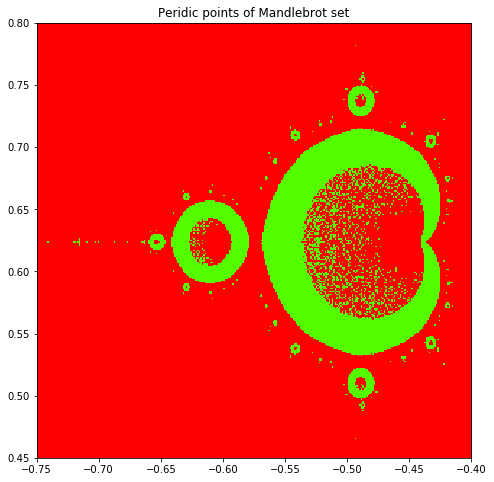

In [3]:
Periodic_points(nx=299, ny=301, xlim=[-2.0,0.5], ylim=[-1.15,1.15], maxloopsm = 100, Plot_ppoints=True, tol=0.000087,inc_static_point=False,tabulate=False)

The above plot gives us intuition about the 'density' of periodic points, and it does indeed seem to retain the basic shape of mandlebrot set.

The following codes are the results of my attempt to plot the orbits of each cycles corresponding to all periodic points. The code itself is identical to the code used to generate the table and plot for periodic points, with minor addition.

C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:31: RuntimeWarning: overflow encountered in square
C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:31: RuntimeWarning: invalid value encountered in square
C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: overflow encountered in absolute
C:\Users\David\Miniconda3\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: invalid value encountered in less


total points:  22166
number of periodic points:  16114


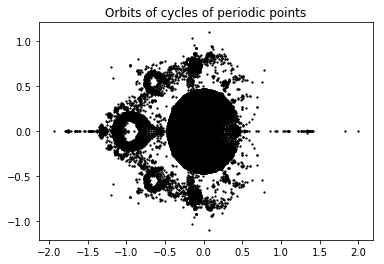

In [6]:
def Periodic_points(nx=299,ny=301,xlim=[-0.75,-0.4],ylim=[0.45,0.8],maxloopsm = 100, Plot_ppoints=True, tol=0.0001, inc_static_point=True,tabulate=False):
    """arguments: (nx,ny,[xmin,xmax],[ymin,ymax],maxloopsm,Plot_ppoints,tol,inc_static_point)
        Plot_ppoints: (boolean) determines whether to generate plot of periodic points on complex plane
        tol: (float) tolerance value used to determine at what difference a cycle is generated.
        inc_static_point: (boolean)determines whether to generate plot including cycle of zero period.
        tabulate: (boolean): decide whether to generate  a table of periodic values with period
        
        This master function generates the plot of collection of initial values that behave periodically upon complex recursion z^2+c.
        also generates a table of periods and their corresponding complex initial values.
        
    """
    #set up grid of complex numbers in a given range specified.
    x = np.linspace( xlim[0], xlim[1], nx )
    y = np.linspace( ylim[0], ylim[1], ny )
    xx,yy = np.meshgrid( x, y )
    c=xx+yy*1j
    #cgrid = xx + 1j * yy
    #z = 0.0 + 0.0j
    reallisttot=[]
    imlisttot=[]

    def mandlebrot_set_count(cgrid, maxloops=maxloopsm):
        """called by show_mandlebrot_set and return a grid of number containig information on the rate of divergence.
        Also returns a list: zz that contains all the values of z values throughout the recursion and stored it as a list."""
        nx, ny = cgrid.shape
        z = np.zeros( [nx,ny], dtype=np.complex )
        nloops = np.zeros( [nx,ny], dtype=np.int16 )
        zz=[]

        for i in range(maxloops):
            z = z**2 + cgrid
            nloops[ np.abs(z) < 2 ] = i
            zz.append(z)

        return nloops,zz

    def show_mandlebrot_set(nx=299, ny=301, xlim=[-0.75,-0.4], ylim=[0.45,0.8], maxloops=maxloopsm, plot=False):
        """ used to generate the plots of mandlebrot set by calling to mandlebrot_set_count.
        Also return (pass) zz list generated by mandle_brot_set_count. To be used in period function"""
        #x = np.linspace( xlim[0], xlim[1], nx )
        #y = np.linspace( ylim[0], ylim[1], ny )
        #xx, yy = np.meshgrid( x, y )
        c = xx + yy*1j
        Total_points=0

        countgrid,zz= mandlebrot_set_count(c, maxloops)
        if plot:
            corners = ( np.min(xx), np.max(xx), np.min(yy), np.max(yy) )
            plt.figure( figsize=(6,6) )
            plt.imshow( countgrid, extent=corners)
            plt.set_cmap('prism')
            
        for i in range(0,len(countgrid)):
            for j in range(0,len(countgrid[i])):
                if countgrid[i][j]==maxloopsm-1:
                    Total_points=Total_points+1
        print("total points: ",Total_points)
        return countgrid,zz

    def period(tol,zz,Plot_ppoints):
        """Used to generate plots and tables of periodic points the periodic plots"""
        Period_ppoint=[]
        
        #For the purpose of plots later, I create 2 more grids. One with zeros and one with initial values of z.
        x2=np.linspace(xlim[0],xlim[1],nx)
        y2=np.linspace(ylim[0],ylim[1],ny)
        xx2,yy2=np.meshgrid(x2,y2)
        c2=xx2+yy2*1j
        TF_Table=np.zeros( [nx,ny], dtype=np.int16 )
        #num_period_set=0
        period_initialvalues=[]
        
        
        for i in range(0,ny):
            for k in range(0,nx):
                
                #to be used in the following codes. see comments below
                TruthTable=[] # used to determine divergence of a list
                list1=[]# used to temporarily store values of z
                targetlist=[] # used to store cycles of a periodic point. Used to determine cardinality of each periodic point.

                for z in range(0,len(zz)):
                    list1.append(zz[z][i][k]) # for convenience, I append the series of z values correspoding to a specific place in the grid as list1
                for y in range(0,len(list1)):
                    TruthTable.append(np.isnan(list1[y])) # to be used to determine divergence in the following code


                for p in range(0,len(list1)-1):
                    if True in TruthTable:   #This if statement triggers is there is a nan (indication of divergence)in the array,
                        break
                    elif abs(list1[-1].real-list1[-2-p].real)<tol and abs(list1[-1].imag-list1[-2-p].imag)<tol:
                        # this elif triggers if it encounetrs a value that is similar to the last element of the list of recursive values z.
                        upper_index=list1.index(list1[-1])
                        low_index=list1.index(list1[-2-p])
                        period_initialvalues.append([(upper_index-low_index),c2[i][k]])

                        for l in range(low_index,upper_index+1): # this target list stores the cycle of a peridic point starting from the end of the list1
                            targetlist.append(list1[l])
                        #if it does encounter a periodic point, it completely skips through that specific list1. So no problem encountered

                        break
                # The decision to include the static points comes down to examining the cardinality of the targetlist.
                # If the cardinality is 1, then its static up to some tolerance. If not, they are periodic
                if inc_static_point==True:
                    if len(targetlist)>0 and len(targetlist)<maxloopsm:
                        TF_Table[i][k]=1
                        Period_ppoint.append([len(targetlist),c2[i][k]])
                        for u in range(0,len(targetlist)):
                            reallisttot.append(targetlist[u].real)
                            imlisttot.append(targetlist[u].imag)
                elif inc_static_point==False:
                    if len(targetlist)>1 and len(targetlist)<maxloopsm:
                        TF_Table[i][k]=1
                        Period_ppoint.append([len(targetlist),c2[i][k]])
                        #print("period: ",len(targetlist)-1)
                        for u in range(0,len(targetlist)):
                            reallisttot.append(targetlist[u].real)
                            imlisttot.append(targetlist[u].imag)
        if tabulate==True:
            print('%-40s%-30s' % ('Period','Periodic Point'))
            for t in range(0,len(period_initialvalues)):
                if period_initialvalues[t][0]==t:
                    print('%-30s%-30s' %(str(period_initialvalues[t][0]),str(period_initialvalues[t][1])))
                else:
                    print('%-40s%-30s' %(str(period_initialvalues[t][0]),str(period_initialvalues[t][1])))

        #ppoint counts the number of periodic points countered up to some tolerance
        ppoint_count=0
        for i in range(0,len(TF_Table)):
            for j in range(0,len(TF_Table[i])):
                if TF_Table[i][j]==1:
                    ppoint_count=ppoint_count+1
        print("number of periodic points: ",ppoint_count)
        if Plot_ppoints==True:
            plt.figure( figsize=(8,8) )
            plt.imshow(TF_Table,extent=[-0.75,-0.4,0.45,0.80])
            plt.set_cmap('prism')
    img,zz = show_mandlebrot_set(299, 301, xlim, ylim, plot=False)
    period(tol,zz,Plot_ppoints)
    plt.title("Orbits of cycles of periodic points")
    plt.plot(reallisttot,imlisttot,'ko',markersize=1.25)
Periodic_points(nx=299,ny=301,xlim=[-2.0,0.5],ylim=[-1.25,1.25],maxloopsm = 100, Plot_ppoints=False, tol=0.000091, inc_static_point=True,tabulate=False)

These orbits of cycles of periodic points barely look like the mandlebrot set. It does seem to confirm my initial suspiciion that orbits of cycles of periodic points do not completely span the entire mandlebrot set because of the existence of stationary points. However this picture opens up more questions than it answers. Why are there so many empty spaces? Why does it look like this?

# Conclusion

I constructed a function that finds periodic points of mandlebrot set up unceratinty. Then generated plots of those periodic points, and they seem to retain the shape of mandlebrot set, but the orbits of cycles of periodic points do not span the entire mandlebrot set.

# Extra notes

In [23]:
# think about why in-place operations are important eg. "z.__imul__(z).__iadd__(cgrid)" 

In [24]:
# can also tweak exponent ie. 2.01 for slightly different shape
# See: https://en.wikipedia.org/wiki/Julia_set#Examples_of_Julia_sets

#https://www.ibm.com/developerworks/community/blogs/jfp/entry/How_To_Compute_Mandelbrodt_Set_Quickly?lang=en

## Periodic and fixed points

http://math.bu.edu/DYSYS/FRACGEOM/node3.html

https://plus.maths.org/content/unveiling-mandelbrot-set

## Fractional dimensions

Consider a square with 4 sides of length $L$ so that the area is $A=L^2$ and the perimeter is $P = 4L$.  We can note that the ratio of $P^2 / A = 16$ is constant while $A/P = L/4$ depends on the size of the square.  It is also obvious that none of these quantities depend on the units of measurement or level of resolution.

Consider a circle with radius $r$ so that the area is $A = \pi r^2$ and the circumference is $P = 2\pi r$.  Again, the ratio of $P^2 / A = 4\pi$ is constant while $A/P = r/2$ depends on the size of the circle.  Of course, nothing about this depends on how we measure the radius or area.

http://www.crisluengo.net/index.php/archives/310